In [ ]:
import cv2 
import os 
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image 
import torch as T 

# CelebAMask-HQ  
将人脸分割图中的brow, eye, lip, mouth, nose, skin等切分出来，作为点

In [ ]:
import os 
import cv2 
import numpy as np 


def make_foreign_CelebAMask_HQ(path_in, path_out, name):
    num_out = len(os.listdir(path_out))
    list_image = os.listdir(path_in)
    for name_image in list_image:
        if any(substring in name_image for substring in ('hair', 'ear', 'neck', 'cloth', 'hat')):
            continue 
        image = cv2.imread(path_in + name_image)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
        indices = np.where(image == 255)
        h1 = indices[0].min()
        h2 = indices[0].max()
        w1 = indices[1].min()
        w2 = indices[1].max()
        if h2-h1+1>=10 and w2-w1+1>=10:
            image = image[h1:h2+1, w1:w2+1]
            cv2.imwrite(path_out + name + '_' + str(num_out) + '.jpg', image)
            num_out += 1

In [ ]:
path_CelebAMask_HQ = 'D:/data/CelebAMask-HQ/CelebAMask-HQ-mask-anno/'
path_foreign = 'D:/data/foreign/CelebAMask_HQ/'
name = 'CelebAMask_HQ'

In [ ]:
path_list = os.listdir(path_CelebAMask_HQ)
for path_ in path_list:
    # make_foreign_CelebAMask_HQ(path_in=path_CelebAMask_HQ+path_+'/', path_out=path_foreign, name=name)
    print(path_, ' Done.')

# sketch-rnn-datasets
将草图数据集每一个笔画提取出来，作为线

In [ ]:
import numpy as np 
import os 
import cv2 


def make_foreign_edge(path_in, path_out, name):
    load_data = np.load(path_in, allow_pickle=True, encoding='latin1')
    num_out = len(os.listdir(path_out))
    for mode in ['train', 'valid', 'test']:
        #
        data = load_data[mode]
        #
        for xy in data:
            #
            points = [[0.0,0.0]]
            for i in range(xy.shape[0]):
                if points == [[0.0,0.0]]:
                    x = 0.0
                    y = 0.0
                    x_min = 0.0
                    y_min = 0.0
                    x_max = 0.0
                    y_max = 0.0
                #
                x += xy[i,0]
                y += xy[i,1]
                x_min = min(x_min, x)
                y_min = min(y_min, y)
                x_max = max(x_max, x)
                y_max = max(y_max, y)
                points.append([x,y])
                #
                if xy[i,2] == 1:
                    h = int(round(y_max-y_min+1))
                    w = int(round(x_max-x_min+1))
                    if h>=10 and w>=10:
                        points = np.array(points).reshape([-1,2])
                        points[:,0] -= x_min 
                        points[:,1] -= y_min
                        points = points.round().astype('int')
                        image = np.zeros([h, w])
                        cv2.polylines(image, [points], False, 255, 1)
                        cv2.imwrite(path_out + name + '_' + str(num_out) + '.jpg', image)
                        num_out += 1
                    points = [[0.0,0.0]]


In [ ]:
for num in range(6):
    #
    if num == 0:
        path_in = 'D:/data/sketch-rnn-datasets-master/aaron_sheep/aaron_sheep.npz'
        path_out = 'D:/data/foreign/aaron_sheep/'
        name = 'aaron_sheep'
    elif num == 1:
        path_in = 'D:/data/sketch-rnn-datasets-master/kanji/kanji.rdp25.npz'
        path_out = 'D:/data/foreign/kanji.rdp25/'
        name = 'kanji.rdp25'
    elif num == 2:
        path_in = 'D:/data/sketch-rnn-datasets-master/kanji/kanji.rdp100.npz'
        path_out = 'D:/data/foreign/kanji.rdp100/'
        name = 'kanji.rdp100'
    elif num == 3:
        path_in = 'D:/data/sketch-rnn-datasets-master/kanji/kanji.rdp200.npz'
        path_out = 'D:/data/foreign/kanji.rdp200/'
        name = 'kanji.rdp200'
    elif num == 4:
        path_in = 'D:/data/sketch-rnn-datasets-master/kanji/short_kanji.npz'
        path_out = 'D:/data/foreign/short_kanji/'
        name = 'short_kanji'
    elif num == 5:
        path_in = 'D:/data/sketch-rnn-datasets-master/omniglot/omniglot.npz'
        path_out = 'D:/data/foreign/omniglot/'
        name = 'omniglot'
    #
    #
    if num==0 or num==5:
        if not os.path.exists(path_out):
            os.makedirs(path_out)
        # make_foreign_edge(path_in, path_out, name)
        print(name, ' Done.')

# 将异物图像保存到npy

In [60]:
import os 
import cv2 
import numpy as np 


def save_image(path_image, path_out):
    list_image = os.listdir(path_image) 
    for name_image in list_image:
        image = cv2.imread(path_image + name_image, cv2.IMREAD_GRAYSCALE)
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        np.save(path_out + name_image[:-3] + 'npy', image)

In [61]:
path_image = 'D:/data/foreign/data/images/' 
path_out = 'D:/data/foreign/data/npys/' 

save_image(path_image, path_out)

In [ ]:
list_image = os.listdir(path_image) 
for name_image in list_image:
    image = cv2.imread(path_image + name_image, cv2.IMREAD_GRAYSCALE)
    # print(image)
    # break

In [ ]:
list_image = os.listdir(path_image) 
for name_image in list_image:
    image1 = np.array(Image.open(path_image + name_image))

In [ ]:
list_image = os.listdir(path_out) 
for name_image in list_image:
    image2 = np.load(path_out + name_image)

# 将模拟的异物图像贴到产品图像上并制作标签

In [ ]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
import os 


def xywh2xyxy(xywh):
    xyxy = xywh.copy()
    xyxy[...,0] = xywh[...,0] - xywh[...,2]/2
    xyxy[...,1] = xywh[...,1] - xywh[...,3]/2
    xyxy[...,2] = xywh[...,0] + xywh[...,2]/2
    xyxy[...,3] = xywh[...,1] + xywh[...,3]/2
    return xyxy


def draw_box(image0, image, labels, img_size):
    # image0 = cv2.cvtColor(image0, cv2.COLOR_GRAY2BGR)
    labels[...,1:] = xywh2xyxy(labels[...,1:])
    labels[...,1:] *= img_size
    labels = labels.round().astype('int')
    #
    for i in range(labels.shape[0]):
        # cv2.rectangle(image, labels[i,1:3]-5, labels[i,3:5]+5, [0,255,0], 1)
        cv2.rectangle(image, labels[i,1:3], labels[i,3:5], [0,255,0], 1)
        # cv2.putText(image, str(0), labels[i,1:3], cv2.FONT_HERSHEY_SIMPLEX, 2, [0,255,0], 2, cv2.LINE_AA)
    #
    plt.figure(figsize=(30,30))
    plt.subplot(1,2,1), plt.imshow(image0, cmap='gray', vmin=0,vmax=255) 
    plt.subplot(1,2,2), plt.imshow(image) 
    plt.show()


class LoadImagesAndLabels():
    #
    def __init__(self,
                 path,
                 img_size,
                 cache_images=True,
                 cache_foreign=True):
        
        self.img_size = img_size
        self.path = path
        self.cache_images = cache_images

        # 产品图
        self.path_background = path
        self.path_image_background = self.path_background + 'data/images/' 
        self.list_image_background = os.listdir(self.path_image_background) 
        if self.cache_images:
            self.path_npy_background = self.path_background + 'data/npys/'
            self.list_npy_background = os.listdir(self.path_npy_background) 

        # 异物图
        self.cache_foreign = cache_foreign ###
        self.path_foreign = 'E:/data/foreign/' 
        self.path_image_foreign = self.path_foreign + 'data/images/' 
        self.list_image_foreign = os.listdir(self.path_image_foreign)
        self.num_foreign = len(self.list_image_foreign)
        if self.cache_foreign:
            self.path_npy_foreign = self.path_foreign + 'data/npys/'
            self.list_npy_foreign = os.listdir(self.path_npy_foreign) 

        self.n = 0

    def rotate(self, image, borderValue, expand):
        h, w = image.shape[:2]
        angle = np.random.uniform(low=0, high=360)
        M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
        if expand:
            cos = np.abs(M[0, 0])
            sin = np.abs(M[0, 1])
            w_new = h * sin + w * cos
            h_new = h * cos + w * sin
            M[0, 2] += (w_new - w) * 0.5
            M[1, 2] += (h_new - h) * 0.5
            w = int(np.round(w_new))
            h = int(np.round(h_new))
        image = cv2.warpAffine(src=image, M=M, dsize=(w,h), borderValue=borderValue)
        return image

    def crop_background(self, image):
        h, w = image.shape[:2]
        h_random = np.random.randint(self.img_size, h+1)
        w_random = np.random.randint(self.img_size, w+1)
        y_random = np.random.randint(h-h_random+1)
        x_random = np.random.randint(w-w_random+1)
        image = image[y_random:y_random+h_random, x_random:x_random+w_random] 
        return image

    def crop_foreign(self, image):
        # indices = np.where(image >= 127)
        indices = np.where(image < image.astype('float32').min() + 50)
        if indices[0].size > 0:
            h1 = indices[0].min()
            h2 = indices[0].max()
            w1 = indices[1].min()
            w2 = indices[1].max()
            image = image[h1:h2+1, w1:w2+1]
            return image
        else:
            return None

    def paste_mask(self, image_background, image_foreign):
        #
        h1, w1 = image_background.shape[:2]
        h2, w2 = image_foreign.shape[:2]
        y_random = np.random.randint(h1-h2+1)
        x_random = np.random.randint(w1-w2+1)
        #
        image_background_roi = image_background[y_random:y_random+h2, x_random:x_random+w2].copy()
        image_background_roi_pad0 = image_background[max(y_random-1,0):min(y_random+h2+1,h1), max(x_random-1,0):min(x_random+w2+1,w1)].copy()
        # if image_background_roi_pad0.astype('float32').mean() >= 245:
        #     return image_background, None
        #
        mask = (image_foreign.astype('float32') < image_background_roi.astype('float32'))
        if not mask.any():
            return image_background, None
        if mask.mean()<=0.5 and image_foreign.size<=4:
            return image_background, None
        #
        image_foreign = image_foreign * mask + image_background_roi * (1-mask)
        #
        # alpha = np.random.uniform(low=0.5, high=1.0-mask.sum()/self.img_size/self.img_size)
        # alpha = np.random.uniform(low=0.0, high=0.8) ###
        alpha = 0.8 ###
        image_background_roi = image_foreign * (1-alpha) + image_background_roi * alpha
        image_background[y_random:y_random+h2, x_random:x_random+w2] = image_background_roi
        image_background_roi_pad = image_background[max(y_random-1,0):min(y_random+h2+1,h1), max(x_random-1,0):min(x_random+w2+1,w1)].copy()
        # if np.random.randint(2):
        #     # image_background_roi = cv2.GaussianBlur(image_background_roi, (3,3), 0)
        #     image_background_roi_pad = cv2.GaussianBlur(image_background_roi_pad, (3,3), 0)
        # image_background[y_random:y_random+h2, x_random:x_random+w2] = image_background_roi
        h3, w3 = image_background_roi_pad.shape
        image_background[y_random:y_random+h2, x_random:x_random+w2] = image_background_roi_pad[y_random-max(y_random-1,0):h3+y_random+h2-min(y_random+h2+1,h1), x_random-max(x_random-1,0):w3+x_random+w2-min(x_random+w2+1,w1)]
        # image_background[y_random:y_random+h2, x_random:x_random+w2] = image_background_roi_expand[1:-1, 1:-1]
        #
        if h2 < 1 or w2 < 1:#image_background_roi_expand0.astype('float32').mean() >= 245 and self.no_label:
            return image_background, None
        if image_background_roi_pad0.astype('float32').mean() >= 245:
            return image_background, None
        xc = x_random + w2 / 2 - 0.5
        yc = y_random + h2 / 2 - 0.5
        label = [0, xc/w1, yc/h1, max(w2/w1,0.015), max(h2/h1,0.015)]
        return image_background, label
    
    def paste_gray(self, image_background, image_foreign):
        #
        h1, w1 = image_background.shape[:2]
        h2, w2 = image_foreign.shape[:2]
        y_random = np.random.randint(1, h1-h2)
        x_random = np.random.randint(1, w1-w2)
        #
        image_background_roi = image_background[y_random:y_random+h2, x_random:x_random+w2].copy()
        image_background_roi_pad0 = image_background[y_random-1:y_random+h2+1, x_random-1:x_random+w2+1]
        if image_background_roi_pad0.astype('float32').mean() >= 245:
            return image_background, None
        #
        mask = image_foreign.astype('float32') < (image_foreign.astype('float32').min() + 50)
        # mask = np.zeros(image_foreign.shape)
        if not mask.any():
            return image_background, None
        if mask.mean()<=0.5 and image_foreign.size<=4:
            return image_background, None
        #
        a = image_foreign[mask].astype('float32').max()
        # print(mask.shape, image_foreign.shape, image_background_roi.shape)
        # print(image_background_roi[1-mask].astype('float32').min())
        mask_inv = np.pad((1-mask).astype(bool), 1, mode='constant', constant_values=True)
        b = image_background_roi_pad0[mask_inv].astype('float32').min() #+ 10
        c = a - b
        if np.random.randint(2):
            d = np.random.randint(c, a+1)
            flag = 0
        else:
            d = c
            flag = 1
        image_foreign = np.clip(image_foreign.astype('float32')-d,0,255).astype('uint8')
        #
        image_foreign = image_background_roi * (1-mask) + image_foreign * mask
        if flag:
            image_background[y_random:y_random+h2, x_random:x_random+w2] = image_foreign
        else:
            #
            alpha = np.random.uniform(low=0.0, high=0.5)
            # alpha = np.random.uniform(low=0.0, high=1.0-mask.sum()/self.img_size/self.img_size)
            image_background[y_random:y_random+h2, x_random:x_random+w2] = image_foreign * (1-alpha) + image_background_roi * alpha
            image_background_roi_pad = image_background[y_random-1:y_random+h2+1, x_random-1:x_random+w2+1].copy()
            if np.random.randint(2):
                image_background_roi_pad = cv2.GaussianBlur(image_background_roi_pad, (3,3), 0)
            image_background[y_random:y_random+h2, x_random:x_random+w2] = image_background_roi_pad[1:-1, 1:-1]
        #
        xc = x_random + w2 / 2 - 0.5
        yc = y_random + h2 / 2 - 0.5
        # label = [0, xc/w1, yc/h1, w2/w1+0.015, h2/h1+0.015]
        label = [0, xc/w1, yc/h1, max(w2/w1,0.015), max(h2/h1,0.015)]
        return image_background, label
    
    def paste_gray2(self, image_background, image_foreign):#泊松融合需要rgb
        #
        h1, w1 = image_background.shape[:2]
        h2, w2 = image_foreign.shape[:2]
        y_random = np.random.randint(1, h1-h2)
        x_random = np.random.randint(1, w1-w2)
        #
        # image_background_roi = image_background[y_random:y_random+h2, x_random:x_random+w2].copy()
        #
        mask = np.ones(image_foreign.shape, dtype='uint8') * 255
        print(int(y_random+h2//2), int(x_random+w2//2))
        print(image_background.shape, image_foreign.shape)
        # image_background = cv2.seamlessClone(image_foreign, image_background, mask, (int(y_random+h2//2), int(x_random+w2//2)), cv2.NORMAL_CLONE)
        image_background = cv2.seamlessClone(image_foreign, image_background, mask, (int(y_random+h2//2), int(x_random+w2//2)), cv2.MIXED_CLONE)
        #
        xc = x_random + w2 / 2 - 0.5
        yc = y_random + h2 / 2 - 0.5
        # label = [0, xc/w1, yc/h1, w2/w1+0.015, h2/h1+0.015]
        label = [0, xc/w1, yc/h1, max(w2/w1,0.015), max(h2/h1,0.015)]
        return image_background, label

    def generate_dot(self, kernel_size=3, sigma=np.random.uniform(0.0, 1.0)):
        #
        d = np.random.uniform(0.5, 1)
        x = np.linspace(-d, d, kernel_size)
        y = np.linspace(-d, d, kernel_size)
        x, y = np.meshgrid(x, y)
        #
        kernel = 1/(2*np.pi*sigma**2) * np.exp(-(x**2+y**2)/(2*sigma**2))
        kernel *= np.random.uniform(0.875, 1.125, size=kernel.shape)
        kernel /= kernel.sum()
        kernel = 1 - kernel 
        # if np.random.randint(2):
        #     kernel = kernel - (kernel.max() - 1)
        # else:
        kernel *= np.random.uniform(0.875, 1.125)
        kernel = np.clip(kernel, 0, 1)
        if np.random.randint(2):
            h, w =  kernel.shape[:2]
            h_random = np.random.randint(1,h+1)
            w_random = np.random.randint(1,w+1)
            y_random = np.random.randint(h-h_random+1)
            x_random = np.random.randint(w-w_random+1)
            kernel = kernel[y_random:y_random+h_random, x_random:x_random+w_random] 
        return kernel 
    
    def paste_dot(self, image_background, image_foreign):
        #
        # if image_foreign.mean() > 0.95:
        #     return image_background, None
        #
        h1, w1 = image_background.shape[:2]
        h2, w2 = image_foreign.shape[:2]
        y_random = np.random.randint(h1-h2+1)
        x_random = np.random.randint(w1-w2+1)
        #
        image_background_roi = image_background[y_random:y_random+h2, x_random:x_random+w2].copy()
        image_background_roi_pad0 = image_background[max(y_random-1,0):min(y_random+h2+1,h1), max(x_random-1,0):min(x_random+w2+1,w1)]
        if image_background_roi_pad0.astype('float32').mean() >= 245:
            return image_background, None
        #
        image_background[y_random:y_random+h2, x_random:x_random+w2] = np.clip(image_background_roi.astype('float32')*image_foreign, 0, 255).astype('uint8')
        #
        image_background_roi_pad = image_background[max(y_random-1,0):min(y_random+h2+1,h1), max(x_random-1,0):min(x_random+w2+1,w1)].copy()
        if np.random.randint(2):
            image_background_roi_pad = cv2.GaussianBlur(image_background_roi_pad, (3,3), 0)
        h3, w3 = image_background_roi_pad.shape 
        image_background[y_random:y_random+h2, x_random:x_random+w2] = image_background_roi_pad[y_random-max(y_random-1,0):h3+y_random+h2-min(y_random+h2+1,h1), x_random-max(x_random-1,0):w3+x_random+w2-min(x_random+w2+1,w1)]
        #
        xc = x_random + w2 / 2 - 0.5
        yc = y_random + h2 / 2 - 0.5
        # label = [0, xc/w1, yc/h1, w2/w1+0.015, h2/h1+0.015]
        label = [0, xc/w1, yc/h1, max(w2/w1,0.015), max(h2/h1,0.015)]
        return image_background, label

    def paste_foreign_to_background(self, image_background):
        # 
        # image_background = cv2.cvtColor(image_background, cv2.COLOR_BGR2GRAY)
        #
        labels = []
        for _ in range(np.random.randint(10, 30+1)):
        # for _ in range(5):
            if 1:
            # if np.random.randint(2):
                id_foreign = np.random.randint(self.num_foreign) 
                name_foreign = self.list_npy_foreign[id_foreign]
                # if 'block' in name_foreign or 'long' in name_foreign:
                #     continue
                if self.cache_foreign:
                    image_foreign = np.load(self.path_npy_foreign + name_foreign)
                else:
                    image_foreign = cv2.imread(self.path_image_foreign + self.list_image_foreign[id_foreign], cv2.IMREAD_GRAYSCALE)
                if np.random.randint(2):
                    image_foreign = image_foreign[:, ::-1]
                if np.random.randint(2):
                    image_foreign = self.rotate(image_foreign, 255, expand=True)
                image_foreign = self.crop_foreign(image_foreign)
                if image_foreign is None:
                    continue
                if max(image_foreign.shape) > self.img_size:
                    continue
                #
                if 'point' in name_foreign or max(image_foreign.shape) < 10:
                    if np.random.randint(2):
                        low_random = 1
                        high_random = 3+1

                        w = np.random.randint(low_random, high_random)
                        if np.random.randint(2):
                            h = w 
                        else:
                            h = np.random.randint(low_random, high_random)
                    else:
                        h, w = image_foreign.shape[:2]
                elif 'CelebA' in name_foreign:
                    t = np.random.randint(1, 256+64+16+4+1)
                    # if t <= 256:
                    #     low_random = 8 # 1 
                    #     high_random = 16+1 # 4+1
                    # elif t <= 256+64:
                    #     low_random = 16 # 4
                    #     high_random = 32+1 # 16+1
                    # elif t <= 256+64+16:
                    #     low_random = 32 # 16
                    #     high_random = 64+1 # 64+1
                    # else:
                    #     low_random = 64 # 64
                    #     high_random = 128+1 # 256+1
                    low_random = 16
                    high_random = low_random + 1
                    # high_random = self.img_size//8+1
                    # print('low_random', low_random, 'high_random', high_random)
                    w = np.random.randint(low_random, high_random)
                    if np.random.randint(2):
                        h = np.random.randint(low_random, high_random)
                    else:
                        h = w
                elif 'shortline' in name_foreign:
                    if np.random.randint(2):
                        h, w = image_foreign.shape[:2]
                    else:
                        h = np.random.randint(max(image_foreign.shape[0]//2,1), min(image_foreign.shape[0]*2,self.img_size//4)+1)
                        w = np.random.randint(max(image_foreign.shape[1]//2,1), min(image_foreign.shape[1]*2,self.img_size//4)+1)
                else:
                    h = np.random.randint(max(image_foreign.shape[0]//4,1), min(image_foreign.shape[0]*4,self.img_size//4)+1)
                    w = np.random.randint(max(image_foreign.shape[1]//4,1), min(image_foreign.shape[1]*4,self.img_size//4)+1)
                    # h = np.random.randint(max(image_foreign.shape[0]//4,1), min(image_foreign.shape[0],self.img_size//4)+1)
                    # w = np.random.randint(max(image_foreign.shape[1]//4,1), min(image_foreign.shape[1],self.img_size//4)+1)
                    # h, w = image_foreign.shape[0]//2, image_foreign.shape[1]//2
                # image_foreign = cv2.resize(image_foreign, (w,h), interpolation=cv2.INTER_AREA)
                image_foreign = cv2.resize(image_foreign, (w,h), interpolation=cv2.INTER_LINEAR)
                #
                # image_background, label = self.paste_mask(image_background, image_foreign)
                # image_background, label = self.paste_gray(image_background, image_foreign)
                image_background, label = self.paste_gray2(image_background, image_foreign)
                if label is not None:
                    labels.append(label)
            else:
                # image_foreign = self.generate_dot(3, 2.0-np.random.uniform(0.0, 2.0))
                # image_foreign = self.generate_dot(3, np.random.uniform(0.3, 1.0))
                image_foreign = self.generate_dot()
                if image_foreign is not None:
                    image_background, label = self.paste_dot(image_background, image_foreign)
                    if label is not None:
                        labels.append(label)
        # if np.random.randint(2):
        #     image_background = cv2.GaussianBlur(image_background, (3,3), 0)
        # image_background = cv2.GaussianBlur(image_background, (3,3), 0)
        # image_background = cv2.blur(image_background, (3,3))
        image_background = cv2.cvtColor(image_background, cv2.COLOR_GRAY2BGR)
        # image_background = cv2.resize(image_background, [self.img_size, self.img_size], cv2.INTER_LINEAR)
        return image_background, np.array(labels).reshape([-1, 5])

    def draw_image_and_box(self):
        i = np.random.randint(len(self.list_image_background))
        # print(self.path_npy_background + self.list_npy_background[i])
        if self.cache_images:
            image0 = np.load(self.path_npy_background + self.list_npy_background[i], allow_pickle=True)
        else:  # read image
            image0 = cv2.imread(self.path_image_background + self.list_image_background[i], cv2.IMREAD_GRAYSCALE)  
        print(image0.shape)
        image0 = cv2.resize(image0, (self.img_size, self.img_size), cv2.INTER_LINEAR)
        print(image0.shape)
        image, labels = self.paste_foreign_to_background(image0.copy())


        # cv2.imwrite('D:/data/cheng_da_generated/data/images/'+str(self.n)+'.jpg', image)
        # with open('D:/data/cheng_da_generated/data/labels/'+str(self.n)+'.txt', 'w') as f:
        #     for label in labels:
        #         f.write(str(int(label[0])) + ' ' + str(label[1]) + ' ' + str(label[2]) + ' ' + str(label[3]) + ' ' + str(label[4]) + '\r')
        # self.n += 1

        draw_box(image0, image, labels, self.img_size)

In [71]:
image_labels = LoadImagesAndLabels('E:/data/cheng_da/', 1024)
image_labels.draw_image_and_box()

(1024, 1024)
(1024, 1024)
869 931
(1024, 1024) (18, 10)


error: OpenCV(4.10.0) C:\b\abs_daut97tdpo\croot\opencv-suite_1722029138522\work\modules\imgproc\src\deriv.cpp:792: error: (-215:Assertion failed) !_src.empty() in function 'cv::Laplacian'


In [164]:
# for _ in range(5000):
#     image_labels.draw_image_and_box()

# 查看异物标签缺失  
在数据增广后缺失部分标签

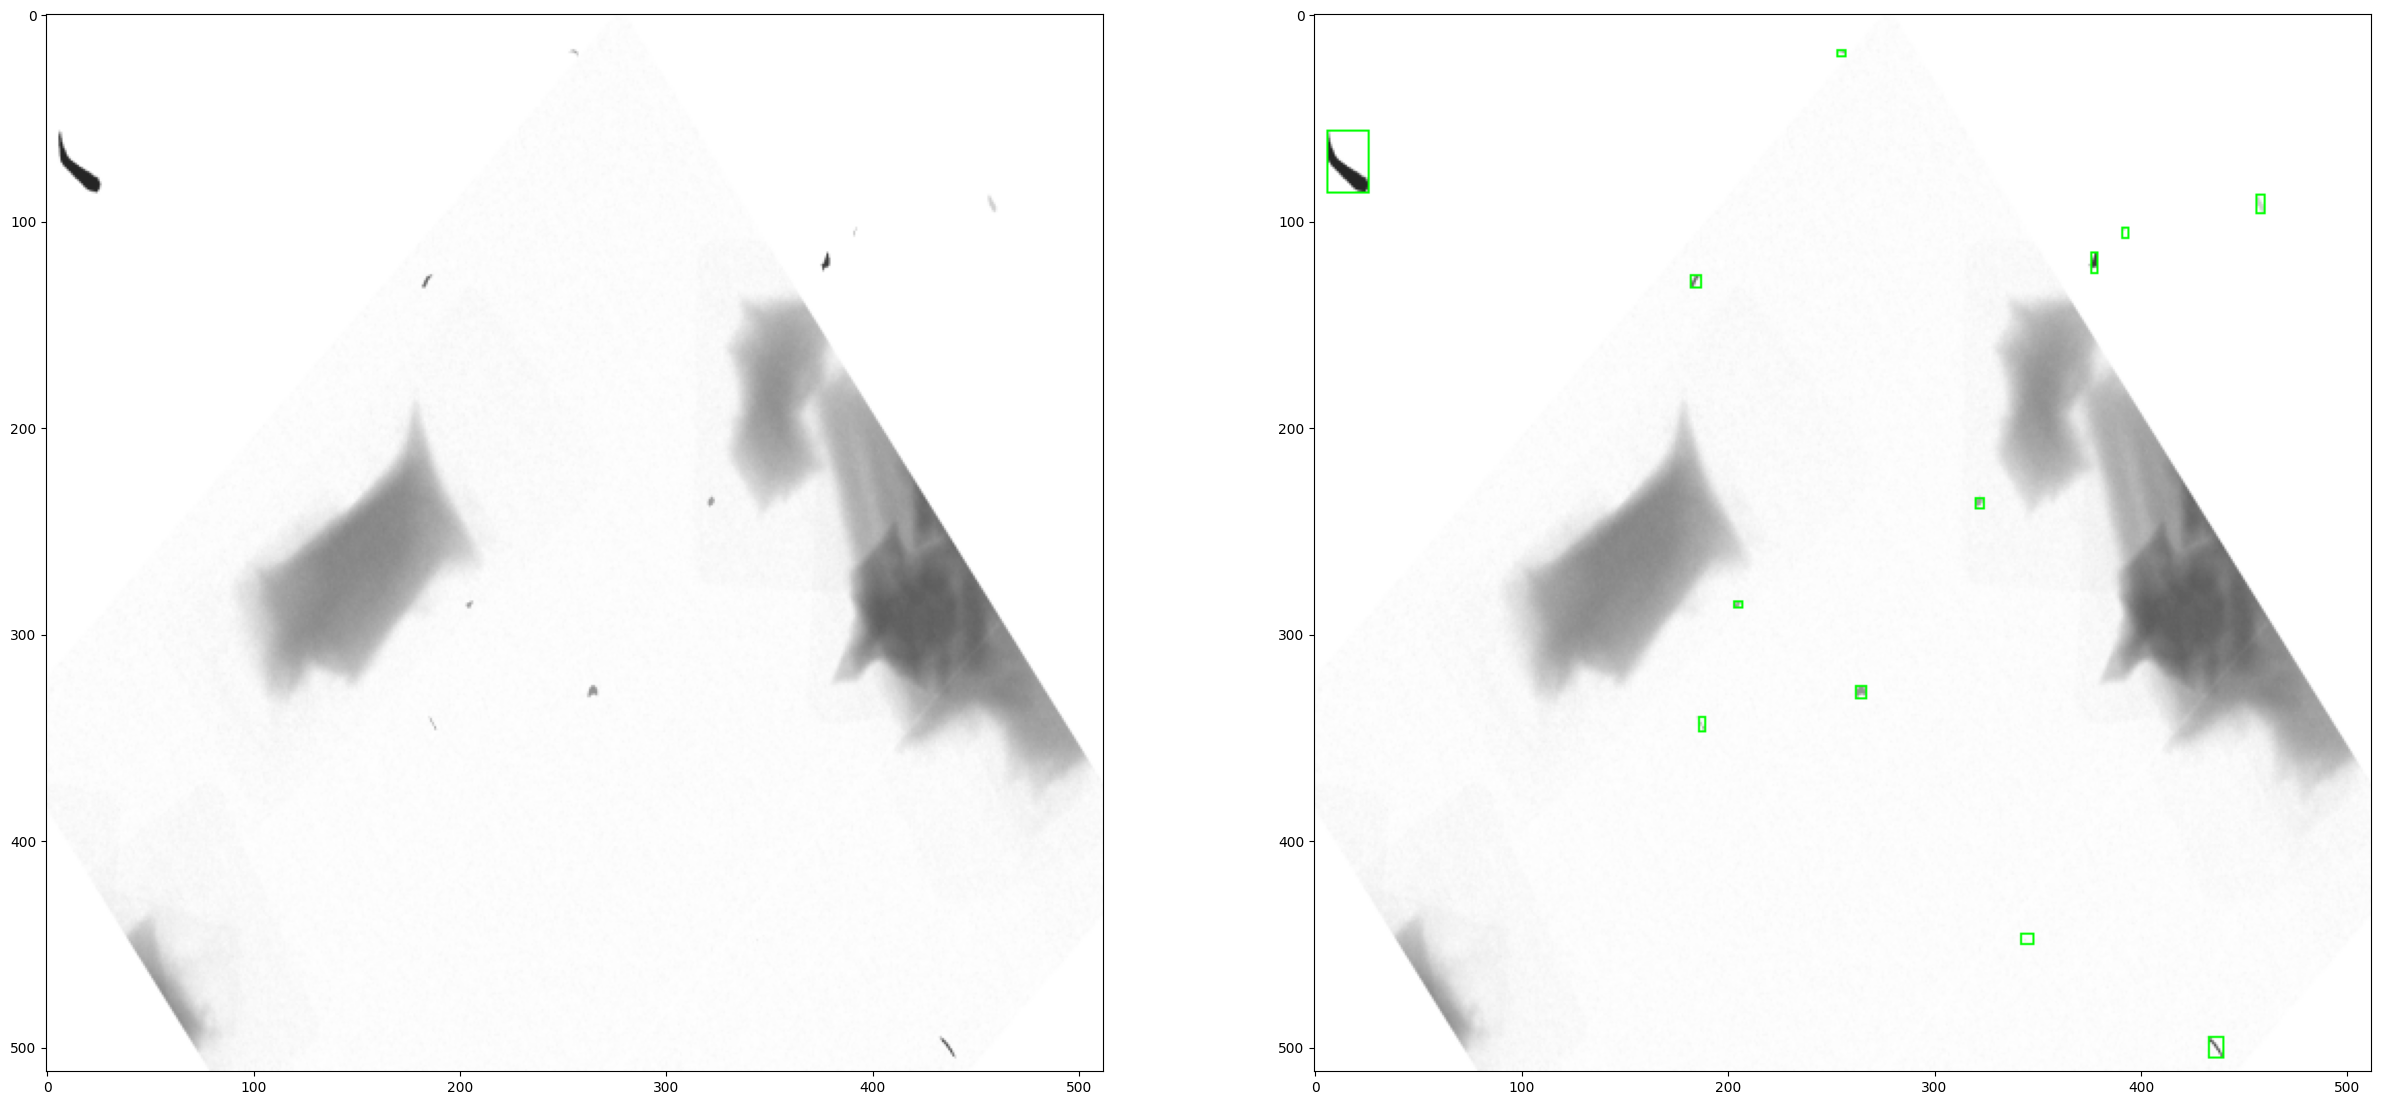

In [528]:
i = np.random.randint(1002)
a = np.load('D:/data/foreign/image_and_label/' + str(i) + '.npz')
image, labels = a['arr_0'], a['arr_1']
image = image.transpose([1,2,0])
draw_box(image, image.copy(), labels, img_size=512)

# 根据json分割标签抠图制作异物数据集

In [35]:
import json 
import os 
import cv2


def json2foreign(path_json, path_image, path_foreign):
    #
    list_json = os.listdir(path_json) 
    for name_json in list_json:
        #
        with open(path_json+name_json, 'r') as f:
            data_json = json.load(f)
        #
        image = cv2.imread(path_image + name_json[:-4] + 'jpg', cv2.IMREAD_GRAYSCALE)
        #
        shapes = data_json['shapes']
        #
        for i, shape in enumerate(shapes):
            # points
            points = np.array(shape['points'], dtype='int32')
            xmin = points[:,0].min().round()
            ymin = points[:,1].min().round()
            xmax = points[:,0].max().round()
            ymax = points[:,1].max().round()
            points = points.reshape([-1, 1, 2])
            # mask
            mask = np.zeros_like(image)
            # cv2.polylines(mask, [points], False, 255, 1)
            cv2.fillPoly(mask, [points], 1)
            # 
            # kernel = np.ones((5, 5), np.uint8)
            # mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel) 
            # mask = cv2.dilate(mask, kernel, 1)
            # image_masked
            image_masked = image * mask + (1-mask)*255
            # image_cropped
            image_cropped = image_masked[ymin:ymax, xmin:xmax]
            #
            cv2.imwrite(path_foreign + name_json[:-5] + '_' + str(i) + '.jpg', image_cropped)

In [36]:
path_json = 'D:/data/xian_mei/data/labels_json/'
path_image = 'D:/data/xian_mei/data/shizi/'
path_foreign = 'D:/data/xian_mei/data/foreigns/'


json2foreign(path_json, path_image, path_foreign)

# 根据json分割标签抠图制作白色背景

In [3]:
import json 
import os 
import cv2
import numpy as np 


def json2foreign(path_json, path_image, path_foreign):
    #
    list_json = os.listdir(path_json) 
    for name_json in list_json:
        #
        with open(path_json+name_json, 'r') as f:
            data_json = json.load(f)
        #
        # image = cv2.imread(path_image + name_json[:-4] + 'jpg', cv2.IMREAD_GRAYSCALE)
        image = cv2.imdecode(np.fromfile(path_image + name_json[:-4] + 'jpg', dtype=np.uint8), cv2.IMREAD_GRAYSCALE)
        #
        shapes = data_json['shapes']
        #
        for i, shape in enumerate(shapes):
            # points
            points = np.array(shape['points'], dtype='int32')
            xmin = points[:,0].min().round()
            ymin = points[:,1].min().round()
            xmax = points[:,0].max().round()
            ymax = points[:,1].max().round()
            points = points.reshape([-1, 1, 2])
            # mask
            mask = np.zeros_like(image)
            # cv2.polylines(mask, [points], False, 255, 1)
            cv2.fillPoly(mask, [points], 1)
            # 
            # kernel = np.ones((5, 5), np.uint8)
            # mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel) 
            # mask = cv2.dilate(mask, kernel, 1)
            # image_masked
            image_masked = image * mask + (1-mask)*255
            # image_cropped
            # image_cropped = image_masked[ymin:ymax, xmin:xmax]
            #
            cv2.imwrite(path_foreign + name_json[:-5] + '_' + str(i) + '.jpg', image_masked)


path_json = 'C:/Users/A/Desktop/1/'
path_image = 'C:/Users/A/Desktop/2/'
path_foreign = 'C:/Users/A/Desktop/3/'


json2foreign(path_json, path_image, path_foreign)

# 根据json分割标签抠图制作mask

In [ ]:
import json 
import os 
import cv2
import numpy as np 


def json2foreign(path_json, path_image, path_foreign):
    #
    list_json = os.listdir(path_json) 
    for name_json in list_json:
        #
        with open(path_json+name_json, 'r') as f:
            data_json = json.load(f)
        #
        # image = cv2.imread(path_image + name_json[:-4] + 'jpg', cv2.IMREAD_GRAYSCALE)
        image = cv2.imdecode(np.fromfile(path_image + name_json[:-4] + 'jpg', dtype=np.uint8), cv2.IMREAD_GRAYSCALE)
        #
        shapes = data_json['shapes']
        #
        for i, shape in enumerate(shapes):
            # points
            points = np.array(shape['points'], dtype='int32')
            # xmin = points[:,0].min().round()
            # ymin = points[:,1].min().round()
            # xmax = points[:,0].max().round()
            # ymax = points[:,1].max().round()
            points = points.reshape([-1, 1, 2])
            # mask
            mask = np.zeros_like(image)
            # cv2.polylines(mask, [points], False, 255, 1)
            cv2.fillPoly(mask, [points], 1)
            #
            cv2.imwrite(path_foreign + name_json[:-5] + '_' + str(i) + '.jpg', mask)


path_json = 'C:/Users/A/Desktop/1/'
path_image = 'E:/data/DeepLearning/Project_xinshida/fish/images/'
path_foreign = 'C:/Users/A/Desktop/3/'


json2foreign(path_json, path_image, path_foreign)

# 根据json分割标签(多边形)抠图制作xml矩形标签

import json 
import xml.etree.ElementTree as ET 
import os 


## 无缩进
def json2xml(path_json, path_xml, path_foreign):
    #
    list_json = os.listdir(path_json) 
    for name_json in list_json:
        #
        root = ET.Element('annotation')
        #
        with open(path_json+name_json, 'r') as f:
            data_json = json.load(f)
            # print(data_json)
        #
        imagePath = data_json['imagePath']
        imagePath = imagePath.split('\\')
        #
        folder = ET.SubElement(root, 'folder')
        folder.text = imagePath[1]
        #
        filename = ET.SubElement(root, 'folder')
        filename.text = imagePath[2]
        # print(imagePath)
        #
        path = ET.SubElement(root, 'path')
        path.text = data_json['imagePath']
        #
        source = ET.SubElement(root, 'source')
        source.text = 'UnKnown'
        #
        size = ET.SubElement(root, 'size')
        width = ET.SubElement(size, 'width')
        width.text = str(data_json['imageWidth'])
        height = ET.SubElement(size, 'height')
        height.text = str(data_json['imageHeight'])
        depth = ET.SubElement(size, 'depth')
        depth.text = '3'
        #
        segmented = ET.SubElement(root, 'segmented')
        segmented.text = '0'
        #
        shapes = data_json['shapes']
        print(shapes)
        #
        for shape in shapes:
            #
            object = ET.SubElement(root, 'object')
            #
            name = ET.SubElement(object, 'name')
            name.text = shape['label']
            #
            pose = ET.SubElement(object, 'pose')
            pose.text = 'Unspecified'
            #
            truncated = ET.SubElement(object, 'truncated')
            truncated.text = '0'
            #
            difficult = ET.SubElement(object, 'difficult')
            difficult.text = '0'
            #
            points = np.array(shape['points'])
            print(points.shape)
            bndbox = ET.SubElement(object, 'bndbox')
            xmin = ET.SubElement(bndbox, 'xmin') 
            xmin.text = str(points[:,0].min())
            ymin = ET.SubElement(bndbox, 'ymin') 
            ymin.text = str(points[:,1].min())
            xmax = ET.SubElement(bndbox, 'xmax') 
            xmax.text = str(points[:,0].max())
            ymax = ET.SubElement(bndbox, 'ymax') 
            ymax.text = str(points[:,1].max())
        #
        tree = ET.ElementTree(root)
        tree.write(path_xml+name_json[:-4]+'xml')

In [ ]:
import json 
from xml.dom.minidom import Document
import os 
import numpy as np 


## 缩进
def json2xml(path_json, path_xml):
    #
    list_json = os.listdir(path_json) 
    for name_json in list_json:
        #
        xmlBuilder = Document()
        # annotation
        annotation = xmlBuilder.createElement("annotation")
        xmlBuilder.appendChild(annotation)
        #
        with open(path_json+name_json, 'r') as f:
            data_json = json.load(f)
        # imagePath
        imagePath = data_json['imagePath']
        imagePath = imagePath.split('\\')
        # folder
        folder = xmlBuilder.createElement("folder")
        foldercontent = xmlBuilder.createTextNode("folder")
        folder.appendChild(foldercontent)
        annotation.appendChild(folder) 
        # filename
        filename = xmlBuilder.createElement("filename")
        filenamecontent = xmlBuilder.createTextNode("filename")
        filename.appendChild(filenamecontent)
        annotation.appendChild(filename)  
        # path
        path = xmlBuilder.createElement("path")  
        pathcontent = xmlBuilder.createTextNode("path")
        path.appendChild(pathcontent)
        annotation.appendChild(path)  
        # source 1
        source = xmlBuilder.createElement("source")  
        # database
        database = xmlBuilder.createElement("database")  
        databasecontent = xmlBuilder.createTextNode('UnKnown')
        database.appendChild(databasecontent)
        source.appendChild(database)  
        # source 2
        annotation.appendChild(source) 
        # size 
        size = xmlBuilder.createElement("size")  
        # width
        width = xmlBuilder.createElement("width")  
        widthcontent = xmlBuilder.createTextNode(str(data_json['imageWidth']))
        width.appendChild(widthcontent)
        size.appendChild(width)  
        # height
        height = xmlBuilder.createElement("height")  
        heightcontent = xmlBuilder.createTextNode(str(data_json['imageHeight']))
        height.appendChild(heightcontent)
        size.appendChild(height)  
        # depth
        depth = xmlBuilder.createElement("depth")  
        depthcontent = xmlBuilder.createTextNode('3')
        depth.appendChild(depthcontent)
        size.appendChild(depth)
        # size
        annotation.appendChild(size)
        # segmented
        segmented = xmlBuilder.createElement("segmented")
        segmentedcontent = xmlBuilder.createTextNode('0')
        segmented.appendChild(segmentedcontent)
        annotation.appendChild(segmented) 
        #
        shapes = data_json['shapes']
        #
        for shape in shapes:
            # object 1
            object = xmlBuilder.createElement("object") 
            # name
            name = xmlBuilder.createElement("name")  
            namecontent = xmlBuilder.createTextNode(shape['label'])
            name.appendChild(namecontent)
            object.appendChild(name) 
            # pose
            pose = xmlBuilder.createElement("pose")  
            posecontent = xmlBuilder.createTextNode('Unspecified')
            pose.appendChild(posecontent)
            object.appendChild(pose) 
            # truncated 
            truncated = xmlBuilder.createElement("truncated")  
            truncatedcontent = xmlBuilder.createTextNode('0')
            truncated.appendChild(truncatedcontent)
            object.appendChild(truncated) 
            # difficult
            difficult = xmlBuilder.createElement("difficult")  
            difficultcontent = xmlBuilder.createTextNode('0')
            difficult.appendChild(difficultcontent)
            object.appendChild(difficult) 
            # points labelimg-xml从1开始；labelme-json从0开始
            points = np.array(shape['points']) + 1
            # bndbox 1
            bndbox = xmlBuilder.createElement("bndbox") 
            # xmin
            xmin = xmlBuilder.createElement("xmin")  
            xmincontent = xmlBuilder.createTextNode(str(points[:,0].min()))
            xmin.appendChild(xmincontent)
            bndbox.appendChild(xmin) 
            # ymin 
            ymin = xmlBuilder.createElement("ymin")  
            ymincontent = xmlBuilder.createTextNode(str(points[:,1].min()))
            ymin.appendChild(ymincontent)
            bndbox.appendChild(ymin) 
            # xmax
            xmax = xmlBuilder.createElement("xmax")  
            xmaxcontent = xmlBuilder.createTextNode(str(points[:,0].max()))
            xmax.appendChild(xmaxcontent)
            bndbox.appendChild(xmax) 
            # ymax
            ymax = xmlBuilder.createElement("ymax")  
            ymaxcontent = xmlBuilder.createTextNode(str(points[:,1].max()))
            ymax.appendChild(ymaxcontent)
            bndbox.appendChild(ymax) 
            # bndbox 2
            object.appendChild(bndbox) 
            # object 2
            annotation.appendChild(object) 
        #
        with open(path_xml+name_json[:-4]+'xml', 'w') as f:
            xmlBuilder.writexml(f, indent='\t', newl='\n', addindent='\t', encoding='utf-8')

In [ ]:
path_json = 'D:/download/WeChat Files/wxid_68zs8yko5utu21/FileStorage/File/2024-03/yanwo(1)/json/'
path_xml = 'D:/download/WeChat Files/wxid_68zs8yko5utu21/FileStorage/File/2024-03/yanwo(1)/Annotations/'


json2xml(path_json, path_xml)

# 把图像和labelme-json中的标签存到同一个pkl文件中

In [ ]:
import numpy as np 
import os 
import json 
import cv2 
import pickle 

In [ ]:
def xyxy2xywh(x):
    # Convert nx4 boxes from [x1, y1, x2, y2] to [x, y, w, h] where xy1=top-left, xy2=bottom-right
    y = x.copy()
    y[..., 0] = (x[..., 0] + x[..., 2]) / 2  # x center
    y[..., 1] = (x[..., 1] + x[..., 3]) / 2  # y center
    y[..., 2] = x[..., 2] - x[..., 0]  # width
    y[..., 3] = x[..., 3] - x[..., 1]  # height
    return y

In [ ]:
def zip_image_and_label(path_json, path_image, path_pkl, scale):
    #
    list_image = os.listdir(path_image) 
    for name_image in list_image:
        #
        try:
            with open(path_json+name_image[:-3]+'json', 'r') as f:
                data_json = json.load(f)
            shapes = data_json['shapes']
            # w = data_json['imageWidth']
            # h = data_json['imageHeight']
        except:
            shapes = []
        #
        image = cv2.imread(path_image + name_image, cv2.IMREAD_GRAYSCALE)
        #
        data = [image]
        for shape in shapes:
            points = np.array(shape['points'], dtype='float32')
            points /= scale 
            data.append(points)
        with open(path_pkl + name_image[:-3] + 'pkl', 'wb') as f:
            pickle.dump(data, f)

In [ ]:
###
name = 'xie_zhuang_gao'
scale = 1 
###
path_json = 'D:/data/' + name + '/data/labels_json/' 
path_image = 'D:/data/' + name + '/data/images/' 
path_pkl = 'D:/data/' + name + '/data/pkls/' 


zip_image_and_label(path_json, path_image, path_pkl, scale)

In [ ]:
for i, x in enumerate([]):
    print(1)

In [ ]:
with open('D:/data/xie_zhuang_gao/data/pkls/11-40-05-10.pkl', 'rb') as f:
	a = pickle.load(f)
	b = a[1:]
	print(len(a))
	print(len(b))
	print(b)

# 根据多边形标签旋转增广样本并制作标签  
针对不容易或不适合使用模拟异物的情况

In [ ]:
import os 
import cv2 
import numpy as np 
import json
import matplotlib.pyplot as plt 
import pickle

In [ ]:
def xywh2xyxy(xywh):
    xyxy = xywh.copy()
    xyxy[...,0] = xywh[...,0] - xywh[...,2]/2
    xyxy[...,1] = xywh[...,1] - xywh[...,3]/2
    xyxy[...,2] = xywh[...,0] + xywh[...,2]/2
    xyxy[...,3] = xywh[...,1] + xywh[...,3]/2
    return xyxy

In [ ]:
def draw_box(image0, image, labels, img_size):
    # image0 = cv2.cvtColor(image0, cv2.COLOR_GRAY2BGR)
    labels[...,1:] = xywh2xyxy(labels[...,1:])
    labels[...,1:] *= img_size
    labels = labels.round().astype('int')
    #
    for i in range(labels.shape[0]):
        cv2.rectangle(image, labels[i,1:3], labels[i,3:5], [0,255,0], 1)
        cv2.putText(image, str(0), labels[i,1:3], cv2.FONT_HERSHEY_SIMPLEX, 2, [0,255,0], 2, cv2.LINE_AA)
    plt.figure(figsize=(30,30))
    plt.subplot(1,2,1), plt.imshow(image0, cmap='gray', vmin=0,vmax=255) 
    plt.subplot(1,2,2), plt.imshow(image) 
    plt.show()

In [ ]:
class LoadImagesAndLabels():
    #
    def __init__(self,
                 path,
                 img_size=512,
                 cache_images=True):
        
        self.img_size = img_size
        self.path = path
        self.cache_images = cache_images

        # 产品标签和图
        self.path = path + 'data/pkls/'
        self.list_data = os.listdir(self.path) 
    
    def rotate(self, image, borderValue, labels):
        h, w = image.shape[:2]
        angle = np.random.uniform(low=0, high=360)
        M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
        cos = np.abs(M[0, 0])
        sin = np.abs(M[0, 1])
        w_new = h * sin + w * cos
        h_new = h * cos + w * sin
        M[0, 2] += (w_new - w) * 0.5
        M[1, 2] += (h_new - h) * 0.5
        # print(M)
        w_new = int(np.round(w_new))
        h_new = int(np.round(h_new))
        image = cv2.warpAffine(src=image, M=M, dsize=(w_new,h_new), borderValue=borderValue)
        h, w = image.shape
        labels_ = []
        for i, points in enumerate(labels):
            points = points.transpose([1,0])
            points = M[:,:2] @ points + M[:,2:]
            # print(points)
            xmin = points[0,:].min() / w
            ymin = points[1,:].min() / h
            xmax = points[0,:].max() / w
            ymax = points[1,:].max() / h
            xc = (xmin + xmax) / 2
            yc = (ymin + ymax) / 2
            labels_.append([0, xc, yc, xmax-xmin, ymax-ymin])
            # labels_.append([0, xmin, ymin, xmax, ymax])
        return image, np.array(labels_).reshape([-1, 5])

    def make_data(self, image, labels):
        #
        image, labels = self.rotate(image, 255, labels)
        #
        image = cv2.resize(image, (self.img_size, self.img_size))
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        print(labels)
        return image, labels
    
    def draw_image_and_box(self):
        i = np.random.randint(len(self.list_data))
        with open(self.path + self.list_data[i], 'rb') as f:
            data = pickle.load(f)
        image0 = data[0]
        labels = data[1:]

        image, labels = self.make_data(image0.copy(), labels)

        draw_box(image0, image, labels, self.img_size)

In [ ]:
image_labels = LoadImagesAndLabels('D:/data/xie_zhuang_gao/', 512)
image_labels.draw_image_and_box()

# 根据多边形标签旋转增广样本并制作标签并保存  

In [ ]:
class LoadImagesAndLabels():
    #
    def __init__(self,
                 path,
                 img_size=512,
                 cache_images=True):
        
        self.img_size = img_size
        self.path = path
        self.cache_images = cache_images

        # 产品标签和图
        self.path = path + 'data/pkls/'
        self.list_data = os.listdir(self.path) 
        self.path_image = path + 'data/images_g/'
        self.path_labels = path + 'data/labels/'
        self.idx = 0
    
    def rotate(self, image, borderValue, labels):
        h, w = image.shape[:2]
        angle = np.random.uniform(low=0, high=360)
        M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
        cos = np.abs(M[0, 0])
        sin = np.abs(M[0, 1])
        w_new = h * sin + w * cos
        h_new = h * cos + w * sin
        M[0, 2] += (w_new - w) * 0.5
        M[1, 2] += (h_new - h) * 0.5
        # print(M)
        w_new = int(np.round(w_new))
        h_new = int(np.round(h_new))
        image = cv2.warpAffine(src=image, M=M, dsize=(w_new,h_new), borderValue=borderValue)
        h, w = image.shape
        labels_ = []
        for i, points in enumerate(labels):
            points = points.transpose([1,0])
            points = M[:,:2] @ points + M[:,2:]
            # print(points)
            xmin = points[0,:].min() / w
            ymin = points[1,:].min() / h
            xmax = points[0,:].max() / w
            ymax = points[1,:].max() / h
            xc = (xmin + xmax) / 2
            yc = (ymin + ymax) / 2
            labels_.append([0, xc, yc, xmax-xmin, ymax-ymin])
            # labels_.append([0, xmin, ymin, xmax, ymax])
        return image, np.array(labels_).reshape([-1, 5])

    def make_data(self, image, labels):
        #
        image, labels = self.rotate(image, 255, labels)
        #
        image = cv2.resize(image, (self.img_size, self.img_size))
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        # cv2.imwrite(self.path_image + str(self.idx) + '.jpg', image)
        # with open(self.path_labels + str(self.idx) + '.txt', 'w') as f:
        #     if labels.shape[0]:
        #         for i in range(labels.shape[0]):
        #             label = labels[i,:]
        #             f.write(str(label[0].int()) + ' ' + str(label[1]) + ' ' + str(label[2]) + ' ' + str(label[3]) + ' ' + str(label[4]) + '\r')
        #     else:
        #         f.write('\r')
        self.idx = self.idx + 1


        # print(labels)
        return image, labels
    
    def draw_image_and_box(self):
        i = np.random.randint(len(self.list_data))
        with open(self.path + self.list_data[i], 'rb') as f:
            data = pickle.load(f)
        image0 = data[0]
        labels = data[1:]

        image, labels = self.make_data(image0.copy(), labels)

        draw_box(image0, image, labels, self.img_size)

In [ ]:
image_labels = LoadImagesAndLabels('D:/data/xie_zhuang_gao/', 512)

In [ ]:
for _ in range(10000):
    image_labels.draw_image_and_box()

In [ ]:
image_labels.draw_image_and_box()

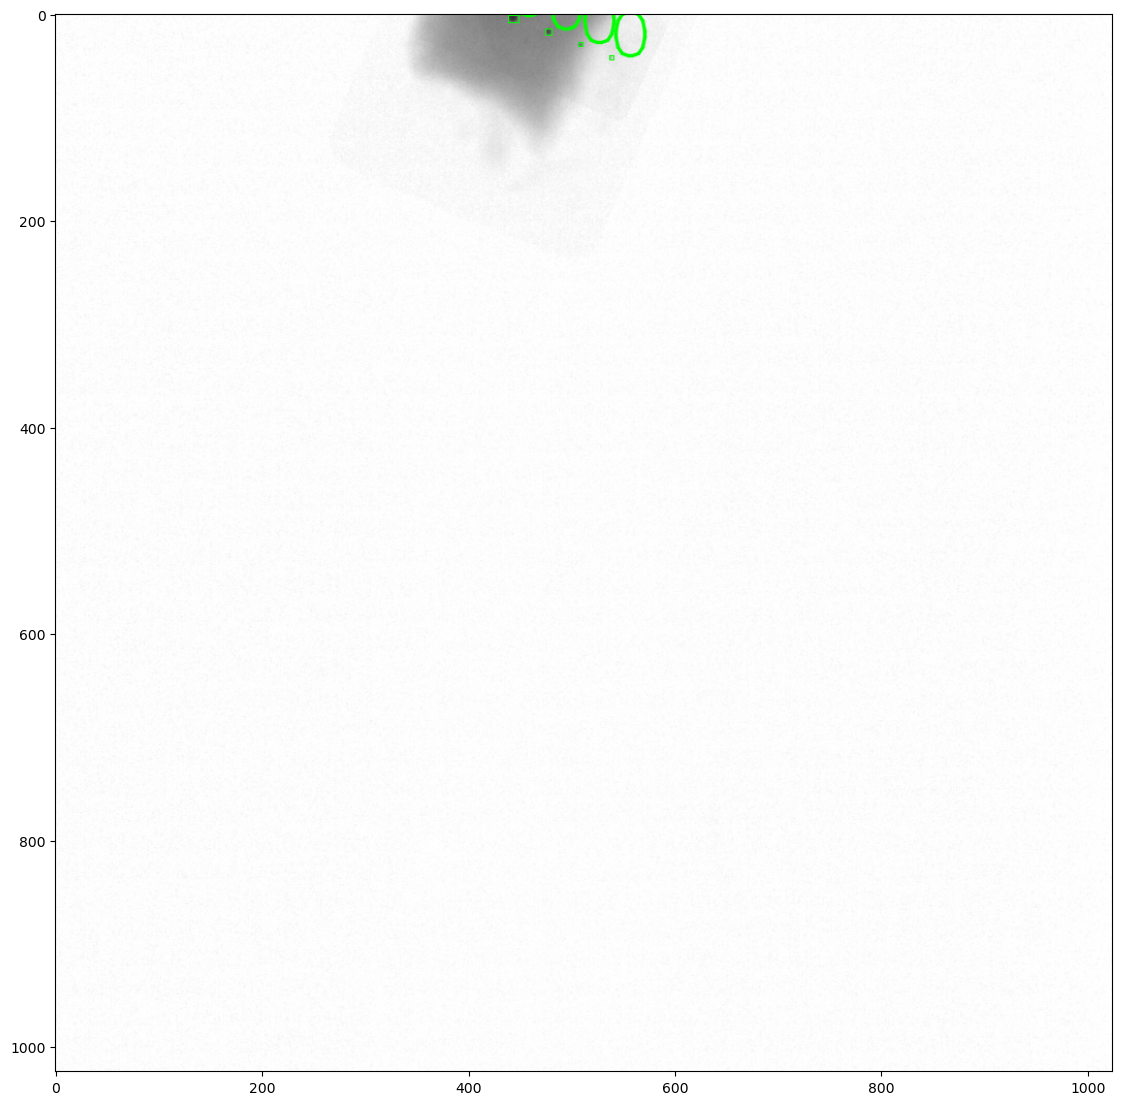

In [437]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 


image = cv2.imread('D:/data/cheng_da/data/images/09-03-57-1.jpg') 
labels = np.loadtxt('D:/data/cheng_da/data/labels/09-03-57-1.txt')
image = image.transpose([1,0,2]).copy()
labels[:,[1,2]] = labels[:,[2,1]]
labels[:,[3,4]] = labels[:,[4,3]]
# image0 = cv2.cvtColor(image0, cv2.COLOR_GRAY2BGR)
labels[...,1:] = xywh2xyxy(labels[...,1:])
labels[...,1:] *= 1024
labels = labels.round().astype('int')
#
for i in range(labels.shape[0]):
    cv2.rectangle(image, labels[i,1:3], labels[i,3:5], [0,255,0], 1)
    cv2.putText(image, str(0), labels[i,1:3], cv2.FONT_HERSHEY_SIMPLEX, 2, [0,255,0], 2, cv2.LINE_AA)
plt.figure(figsize=(30,30))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray', vmin=0,vmax=255) 
plt.show()


# 利用规则生成小异物

In [66]:
# import numpy as np 
# import matplotlib.pyplot as plt 


# def generate_dot(size=5):
#     #
#     # image = np.ones([size,size])
#     image = np.zeros([size,size])
#     #
#     temp_size = size
#     # exist_size = size
#     while temp_size >= 1:
#         #
#         # if np.random.randint(2):
#         crop_size = (size-temp_size)//2
#         # image[crop_size:size-crop_size, crop_size:size-crop_size] *= np.random.uniform(0.5, 1, size=(temp_size, temp_size))
#         image[crop_size:size-crop_size, crop_size:size-crop_size] -= np.random.randint(1, 20, size=(temp_size, temp_size))
#         # else:
#         #     if exist_size == temp_size:
#         #         exist_size -= 2
#         #
#         temp_size -= 2
#     #
#     # if exist_size >= 1:
#     #     #
#     #     crop_size2 = (size-exist_size)//2
#     #     image = image[crop_size2:size-crop_size2, crop_size2:size-crop_size2]
#         #
#     if np.random.randint(2) and image.size > 1:
#         h, w = image.shape
#         h_random = np.random.randint(1,h+1)
#         w_random = np.random.randint(1,w+1)
#         y_random = np.random.randint(h-h_random+1)
#         x_random = np.random.randint(w-w_random+1)
#         image = image[y_random:y_random+h_random, x_random:x_random+w_random] 
#     print(image)
#     return image
#     # else:
#     #     return None

#     #     return image
#     # else:
#     #     return None
#     # # print(image)
#     # # print(not1)

In [76]:
import numpy as np


def generate_gaussian_kernel(kernel_size, sigma):
    x = np.linspace(-(kernel_size//2), kernel_size//2, kernel_size)
    y = np.linspace(-(kernel_size//2), kernel_size//2, kernel_size)
    x, y = np.meshgrid(x, y)
    gaussian_kernel = 1/(2*np.pi*sigma**2) * np.exp(-(x**2+y**2)/(2*sigma**2))
    gaussian_kernel = gaussian_kernel/gaussian_kernel.sum()
    return gaussian_kernel


image = 1 - generate_gaussian_kernel(3, 0.7)
print(image)

[[0.95612919 0.87828802 0.95612919]
 [0.87828802 0.66233118 0.87828802]
 [0.95612919 0.87828802 0.95612919]]


In [77]:
import numpy as np 
import matplotlib.pyplot as plt 


def generate_dot(kernel_size, sigma):
    #
    # print("sigma:", 0.3 * ((kernel_size - 1) * 0.5 - 1) + 0.8)
    #
    d = np.random.uniform(0.5, 1)
    # d = 1
    x = np.linspace(-d, d, kernel_size)
    y = np.linspace(-d, d, kernel_size)
    x, y = np.meshgrid(x, y)
    #
    kernel = 1/(2*np.pi*sigma**2) * np.exp(-(x**2+y**2)/(2*sigma**2))
    kernel *= np.random.uniform(0.875, 1.125, size=kernel.shape)
    kernel /= kernel.sum()
    kernel = 1 - kernel 
    kernel *= np.random.uniform(0.875, 1.125)
    kernel = np.clip(kernel, 0, 1)
    return kernel

In [106]:
image = generate_dot(5, np.random.uniform(0.0, 1.0))
# image = generate_dot(3, 0.2)
print(image)

[[0.88378847 0.87037838 0.86768756 0.8743421  0.88284507]
 [0.87049821 0.86517293 0.8547543  0.85400169 0.87222142]
 [0.86853371 0.85529019 0.85153573 0.85693074 0.87173708]
 [0.87657747 0.85411364 0.85309627 0.86213139 0.87729215]
 [0.88461241 0.87478124 0.86950818 0.87209866 0.8855116 ]]


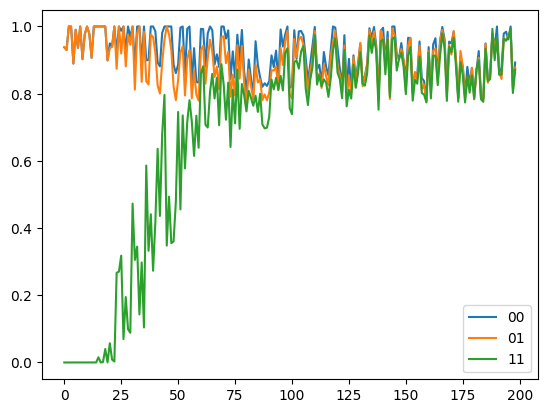

In [1249]:
import matplotlib.pyplot as plt 


dots00 = []
dots01 = [] 
dots11 = []
for i in range(1,200):
    image = generate_dot(3, i/100)
    # print(image)
    dots00.append(image[0,0])
    dots01.append(image[0,1])
    dots11.append(image[1,1])

plt.plot(dots00, label='00')
plt.plot(dots01, label='01')
plt.plot(dots11, label='11')
plt.legend()
plt.show()



# 根据xml标签裁剪制作异物数据集

In [3]:
import numpy as np 
import cv2 
import xml.etree.ElementTree as ET 
import os 
import shutil 


def xml2foreign(path_label, path_image, path_out):
    #
    list_labels = os.listdir(path_label)
    for j, labels in enumerate(list_labels):
        #
        name_file = labels.split('.')[0]
        image = cv2.imread(path_image + name_file + '.jpg', cv2.IMREAD_GRAYSCALE)
        #
        tree = ET.parse(path_label + labels)
        objects = tree.findall('object')
        for i, object_ in enumerate(objects):
            #
            name_class = object_.find('name').text
            x1 = int(round(float(object_.find('bndbox').find('xmin').text)))
            y1 = int(round(float(object_.find('bndbox').find('ymin').text)))
            x2 = int(round(float(object_.find('bndbox').find('xmax').text)))
            y2 = int(round(float(object_.find('bndbox').find('ymax').text)))
            #
            image_sub = image[max(y1-1,0):y2, max(x1-1,0):x2, ...]
            cv2.imwrite(f'{path_out}{name_file}_{i}_{name_class}.jpg', image_sub) 


###
name = 'mei_bi_location_whole'
###
path_label = 'D:/data/' + name + '/data/Annotations/' 
path_image = 'D:/data/' + name + '/data/images/' 
path_out = 'D:/data/' + name + '/data/foreign/' 
if os.path.exists(path_out):
    shutil.rmtree(path_out)
os.makedirs(path_out)


xml2foreign(path_label, path_image, path_out)

# 根据xml标签抠图制作异物数据集

In [1]:
import numpy as np 
import cv2 
import xml.etree.ElementTree as ET 
import os 
import shutil 


def xml2foreign(path_label, path_image, path_out):
    #
    list_labels = os.listdir(path_label)
    for j, labels in enumerate(list_labels):
        #
        name_file = labels.split('.')[0]
        image = cv2.imread(path_image + name_file + '.jpg', cv2.IMREAD_GRAYSCALE)
        image_blur = cv2.blur(image, (5, 5))
        # image_blur = image.copy()
        #
        tree = ET.parse(path_label + labels)
        objects = tree.findall('object')
        for i, object_ in enumerate(objects):
            #
            name_class = object_.find('name').text
            x1 = int(round(float(object_.find('bndbox').find('xmin').text)))
            y1 = int(round(float(object_.find('bndbox').find('ymin').text)))
            x2 = int(round(float(object_.find('bndbox').find('xmax').text)))
            y2 = int(round(float(object_.find('bndbox').find('ymax').text)))
            #
            image_sub = image_blur[max(y1-1,0):y2, max(x1-1,0):x2, ...]
            mask = cv2.adaptiveThreshold(image_sub, 1, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
            mask = 1 - mask 
            contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            max_contour = max(contours, key=cv2.contourArea)
            mask = np.zeros_like(mask)
            cv2.drawContours(mask, [max_contour], 0, 1, -1)
            image_sub = image[max(y1-1,0):y2, max(x1-1,0):x2, ...] * mask + 255*(1-mask)
            #
            # if image_sub.astype(np.float32).max() > image_sub.astype(np.float32).min() + 50:
            #     mask2 = cv2.adaptiveThreshold(image_sub, 1, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
            #     mask2 = 1 - mask2
            #     contours2, _ = cv2.findContours(mask2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            #     max_contour2 = max(contours2, key=cv2.contourArea)
            #     result2 = np.zeros_like(mask2)
            #     cv2.drawContours(result2, [max_contour2], 0, 1, -1)
            #     mask2 = result2.copy()
            #     image_sub = image[max(y1-1,0):y2, max(x1-1,0):x2, ...] * mask2 + 255*(1-mask2)
            # print(image_sub.shape)
            cv2.imwrite(f'{path_out}{name_file}_{i}_{name_class}.jpg', image_sub) 
        # if j == 1:
        #     break
        # break 


###
name = 'mei_bi'
###
path_label = 'D:/data/' + name + '/data/Annotations/' 
path_image = 'D:/data/' + name + '/data/images/' 
path_out = 'D:/data/' + name + '/data/foreign/' 
if os.path.exists(path_out):
    shutil.rmtree(path_out)
os.makedirs(path_out)


xml2foreign(path_label, path_image, path_out)

# 将抠出的ok、ng图贴到白图上，并制作标签  
检测整体缺陷

In [ ]:
import numpy as np 
import cv2 
import os 


def 
